# Business Understanding

Interconnect es una empresa líder en telecomunicaciones que ofrece servicios de Internet de banda ancha, telefonía fija y móvil, y paquetes convergentes a más de 1 millón de clientes en España y América Latina. Su propuesta de valor se basa en la calidad de la red, atención al cliente 24/7 y políticas de facturación flexibles.

### Problema a resolver

El equipo de marketing quiere anticipar qué clientes tienen mayor probabilidad de cancelar su suscripción (“churn”) para ofrecerles promociones personalizadas y reducir así la tasa de abandono. Identificar tempranamente a estos usuarios permite diseñar incentivos (descuentos, upgrades, upgrades de plan) con un coste de retención inferior al de captar nuevos clientes.

### KPI's principales

* **Churn Rate:** porcentaje de clientes que cancelan en un período determinado.
* **AUC-ROC:** mide la capacidad del modelo para distinguir churners y no-churners.
* **Precision:** proporción de alertas de churn que realmente acaban abandonando.
* **Recall:** proporción de churners reales que fueron correctamente identificados.

# Data Understanding

In [77]:
import pandas as pd

In [78]:
df_contract = pd.read_csv('../data/contract.csv')
df_personal = pd.read_csv('../data/personal.csv')
df_internet = pd.read_csv('../data/internet.csv')
df_phone    = pd.read_csv('../data/phone.csv')

In [79]:
import numpy as np

def eda(df: pd.DataFrame) -> None:
    n = len(df)
    
    # 1) Data types
    print("=== Data Types ===")
    print(df.dtypes)
    
    # 2) Missing values
    print("\n=== Missing Values ===")
    null_counts = df.isnull().sum()
    null_pct    = (null_counts / n * 100).round(2)
    miss = pd.DataFrame({
        "null_count": null_counts,
        "null_pct":   null_pct
    }).sort_values("null_count", ascending=False)
    print(miss[miss.null_count > 0].to_string())
    
    # 3) Descriptive statistics
    print("\n=== Descriptive Statistics ===")
    print(df.describe(include='all').transpose())
    
    # 4) Outlier detection (IQR)
    print("\n=== Outlier Detection (IQR) ===")
    num_cols = df.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr    = q3 - q1
        lb, ub = q1 - 1.5*iqr, q3 + 1.5*iqr
        mask   = (df[col] < lb) | (df[col] > ub)
        count  = mask.sum()
        print(f"{col:20s} → {count:4d} outliers (bounds: [{lb:.2f}, {ub:.2f}])")


In [80]:
eda(df_contract)

=== Data Types ===
customerID           object
BeginDate            object
EndDate              object
Type                 object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

=== Missing Values ===
Empty DataFrame
Columns: [null_count, null_pct]
Index: []

=== Descriptive Statistics ===
                   count unique               top  freq       mean        std  \
customerID          7043   7043        7590-VHVEG     1        NaN        NaN   
BeginDate           7043     77        2014-02-01   366        NaN        NaN   
EndDate             7043      5                No  5174        NaN        NaN   
Type                7043      3    Month-to-month  3875        NaN        NaN   
PaperlessBilling    7043      2               Yes  4171        NaN        NaN   
PaymentMethod       7043      4  Electronic check  2365        NaN        NaN   
MonthlyCharges    7043.0    NaN               NaN   NaN  64.76

In [81]:
eda(df_personal)

=== Data Types ===
customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object

=== Missing Values ===
Empty DataFrame
Columns: [null_count, null_pct]
Index: []

=== Descriptive Statistics ===
                count unique         top  freq      mean       std  min  25%  \
customerID       7043   7043  7590-VHVEG     1       NaN       NaN  NaN  NaN   
gender           7043      2        Male  3555       NaN       NaN  NaN  NaN   
SeniorCitizen  7043.0    NaN         NaN   NaN  0.162147  0.368612  0.0  0.0   
Partner          7043      2          No  3641       NaN       NaN  NaN  NaN   
Dependents       7043      2          No  4933       NaN       NaN  NaN  NaN   

               50%  75%  max  
customerID     NaN  NaN  NaN  
gender         NaN  NaN  NaN  
SeniorCitizen  0.0  0.0  1.0  
Partner        NaN  NaN  NaN  
Dependents     NaN  NaN  NaN  

=== Outlier Detection (IQR) ===
SeniorCitizen        → 1142 outli

In [82]:
eda(df_internet)

=== Data Types ===
customerID          object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object

=== Missing Values ===
Empty DataFrame
Columns: [null_count, null_pct]
Index: []

=== Descriptive Statistics ===
                 count unique          top  freq
customerID        5517   5517   7590-VHVEG     1
InternetService   5517      2  Fiber optic  3096
OnlineSecurity    5517      2           No  3498
OnlineBackup      5517      2           No  3088
DeviceProtection  5517      2           No  3095
TechSupport       5517      2           No  3473
StreamingTV       5517      2           No  2810
StreamingMovies   5517      2           No  2785

=== Outlier Detection (IQR) ===


In [83]:
eda(df_phone)

=== Data Types ===
customerID       object
MultipleLines    object
dtype: object

=== Missing Values ===
Empty DataFrame
Columns: [null_count, null_pct]
Index: []

=== Descriptive Statistics ===
              count unique         top  freq
customerID     6361   6361  5575-GNVDE     1
MultipleLines  6361      2          No  3390

=== Outlier Detection (IQR) ===


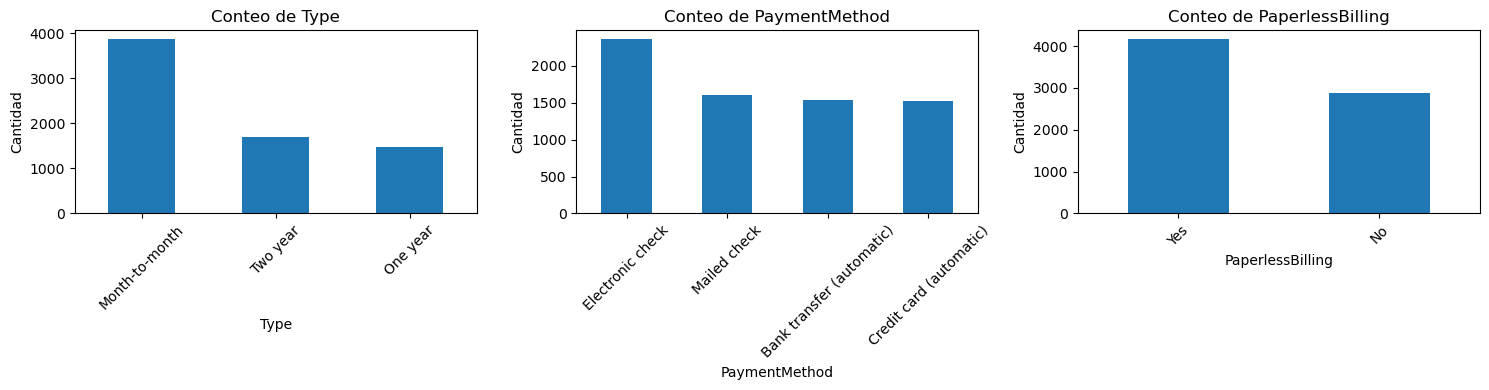

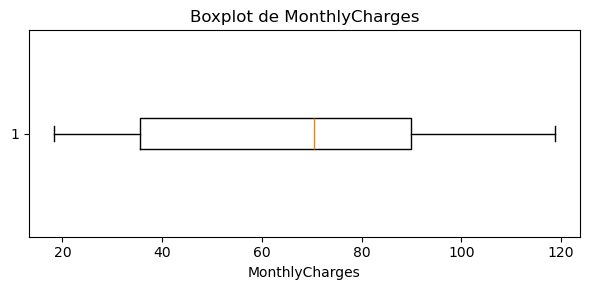

In [84]:
import matplotlib.pyplot as plt

# 2) Barras para variables categóricas clave
fig, axes = plt.subplots(1, 3, figsize=(15,4))
cats = ['Type','PaymentMethod','PaperlessBilling']
for ax, col in zip(axes, cats):
    df_contract[col].value_counts().plot.bar(ax=ax)
    ax.set_title(f'Conteo de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Cantidad')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()

# 3) Boxplot de MonthlyCharges
plt.figure(figsize=(6,3))
plt.boxplot(df_contract['MonthlyCharges'].dropna(), vert=False)
plt.title('Boxplot de MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.tight_layout()

plt.show()


# Data Preparation

In [ ]:
import pandas as pd
import numpy as np

def prepare_contract(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    # 1) Fechas
    df['BeginDate'] = pd.to_datetime(df['BeginDate'])
    df['EndDate']   = df['EndDate'].replace({'No': pd.NA})
    df['EndDate']   = pd.to_datetime(df['EndDate'])
    
    # 1.1) Calcular tenure (antigüedad en meses) con año y mes
    cutoff = pd.Timestamp.today().normalize()
    df['EndDate_filled'] = df['EndDate'].fillna(cutoff)
    df['tenure'] = (
        (df['EndDate_filled'].dt.year - df['BeginDate'].dt.year) * 12
        + (df['EndDate_filled'].dt.month - df['BeginDate'].dt.month)
    ).astype(int)
    df.drop(columns=['EndDate_filled'], inplace=True)
    
    # 2) Columna abandoned (churn)
    df['abandoned'] = df['EndDate'].notna().astype(int)
    
    # 3) PaperlessBilling → 1/0
    df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
    
    # 4) TotalCharges → float (coerce errores a NaN)
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    
    # 5) Features de año/mes de entrada y salida
    df['BeginYear']  = df['BeginDate'].dt.year.astype(int)
    df['BeginMonth'] = df['BeginDate'].dt.month.astype(int)
    df['EndYear']    = df['EndDate'].dt.year.astype('Int64')
    df['EndMonth']   = df['EndDate'].dt.month.astype('Int64')
    
    # 6) One-hot encoding en 0/1
    df = pd.get_dummies(
        df,
        columns=['PaymentMethod', 'Type'],
        prefix=['PM', 'ContractType'],
        drop_first=True,
        dtype=int
    )
    
    return df

In [87]:
df_prepared_contract = prepare_contract(df_contract)
#df_prepared_contract.to_csv('../data/contract_prepared.csv', index=False)

In [88]:
df_prepared_contract

,customerID,BeginDate,EndDate,PaperlessBilling,MonthlyCharges,TotalCharges,tenure,abandoned,BeginYear,BeginMonth,EndYear,EndMonth,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,ContractType_One year,ContractType_Two year
0,7590-VHVEG,2020-01-01,NaT,1,29.85,29.85,64,0,2020,1,<NA>,<NA>,0,1,0,0,0
1,5575-GNVDE,2017-04-01,NaT,0,56.95,1889.50,97,0,2017,4,<NA>,<NA>,0,0,1,1,0
2,3668-QPYBK,2019-10-01,2019-12-01,1,53.85,108.15,2,1,2019,10,2019,12,0,0,1,0,0
3,7795-CFOCW,2016-05-01,NaT,0,42.30,1840.75,108,0,2016,5,<NA>,<NA>,0,0,0,1,0
4,9237-HQITU,2019-09-01,2019-11-01,1,70.70,151.65,2,1,2019,9,2019,11,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,1,84.80,1990.50,87,0,2018,2,<NA>,<NA>,0,0,1,1,0
7039,2234-XADUH,2014-02-01,NaT,1,103.20,7362.90,135,0,2014,2,<NA>,<NA>,1,0,0,1,0
7040,4801-JZAZL,2019-03-01,NaT,1,29.60,346.45,74,0,2019,3,<NA>,<NA>,0,1,0,0,0
7041,8361-LTMKD,2019-07-01,2019-11-01,1,74.40,306.60,4,1,2019,7,2019,11,0,0,1,0,0


In [89]:
def prepare_internet(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    # 1) Reemplazar Yes/No por 1/0
    binary_cols = [
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies'
    ]
    for col in binary_cols:
        df[col] = df[col].map({'Yes': 1, 'No': 0})
    
    # 2) One-hot encoding de InternetService
    df = pd.get_dummies(
        df,
        columns=['InternetService'],
        prefix='NetSvc',
        drop_first=True,
        dtype=int
    )
    
    return df


In [90]:
df_prepared_internet = prepare_internet(df_internet)

In [91]:
df_prepared_internet

,customerID,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,NetSvc_Fiber optic
0,7590-VHVEG,0,1,0,0,0,0,0
1,5575-GNVDE,1,0,1,0,0,0,0
2,3668-QPYBK,1,1,0,0,0,0,0
3,7795-CFOCW,1,0,1,1,0,0,0
4,9237-HQITU,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,1,0,1,1,1,1,0
5513,2234-XADUH,0,1,1,0,1,1,1
5514,4801-JZAZL,1,0,0,0,0,0,0
5515,8361-LTMKD,0,0,0,0,0,0,1


In [92]:
def prepare_personal(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    # 1) Género
    df['gender'] = df['gender'].map({'Female': 0, 'Male': 1}).astype(int)
    
    # 2) Partner
    df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0}).astype(int)
    
    # 3) Dependents
    df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0}).astype(int)
    
    return df

In [93]:
df_prepared_personal = prepare_personal(df_personal)

In [94]:
df_prepared_personal

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,0,0,1,0
1,5575-GNVDE,1,0,0,0
2,3668-QPYBK,1,0,0,0
3,7795-CFOCW,1,0,0,0
4,9237-HQITU,0,0,0,0
...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1
7039,2234-XADUH,0,0,1,1
7040,4801-JZAZL,0,0,1,1
7041,8361-LTMKD,1,1,1,0


In [95]:
def prepare_phone(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0}).astype(int)
    
    return df

In [96]:
df_prepared_phone = prepare_phone(df_phone)

In [97]:
df_prepared_phone

,customerID,MultipleLines
0,5575-GNVDE,0
1,3668-QPYBK,0
2,9237-HQITU,0
3,9305-CDSKC,1
4,1452-KIOVK,1
...,...,...
6356,2569-WGERO,0
6357,6840-RESVB,1
6358,2234-XADUH,1
6359,8361-LTMKD,1


# Modeling and Evaluation

In [98]:
df_prepared_contract['abandoned'].value_counts() # la data no está balanceada

abandoned
0    5174
1    1869
Name: count, dtype: int64

In [99]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

# — (2) Merge y X,y
df = (
    df_prepared_contract
    .merge(df_prepared_personal, on='customerID')
    .merge(df_prepared_internet, on='customerID')
    .merge(df_prepared_phone,    on='customerID')
)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('abandoned')
X = df[numeric_cols].fillna(0)
y = df['abandoned']

# — (3) Crear listas de features por grupo
contract_feats = [
    c for c in df_prepared_contract.select_dtypes(include=[np.number]).columns
    if c!='abandoned' and c in X.columns
]
personal_feats = [
    c for c in df_prepared_personal.select_dtypes(include=[np.number]).columns
    if c in X.columns
]
internet_feats = [
    c for c in df_prepared_internet.select_dtypes(include=[np.number]).columns
    if c in X.columns
]
phone_feats = [
    c for c in df_prepared_phone.select_dtypes(include=[np.number]).columns
    if c in X.columns
]

feature_sets = {
    'contract_only': contract_feats,
    'personal_only': personal_feats,
    'internet_only': internet_feats,
    'phone_only':    phone_feats,
    'all_features':  numeric_cols
}

# — (4) Definir modelos base (sin gridsearch para simplificar aquí)
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest'      : RandomForestClassifier(n_estimators=100, random_state=42),
    'HGBClassifier'     : HistGradientBoostingClassifier(random_state=42)
}

# — (5) Evaluar con Stratified K-Fold CV en train (70-30 split opcional)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("=== AUC-ROC por modelo y subconjunto de features (CV k=5) ===")
for name, model in models.items():
    for fs_name, feats in feature_sets.items():
        scores = cross_val_score(
            model,
            X[feats],
            y,
            cv=cv,
            scoring='roc_auc',
            n_jobs=-1
        )
        print(f"{name:20s} | {fs_name:15s} → "
              f"{scores.mean():.3f} ± {scores.std():.3f}")


=== AUC-ROC por modelo y subconjunto de features (CV k=5) ===
LogisticRegression   | contract_only   → 1.000 ± 0.000
LogisticRegression   | personal_only   → 0.621 ± 0.018
LogisticRegression   | internet_only   → 0.756 ± 0.011
LogisticRegression   | phone_only      → 0.510 ± 0.017
LogisticRegression   | all_features    → 1.000 ± 0.000
RandomForest         | contract_only   → 1.000 ± 0.000
RandomForest         | personal_only   → 0.618 ± 0.018
RandomForest         | internet_only   → 0.743 ± 0.014
RandomForest         | phone_only      → 0.510 ± 0.017
RandomForest         | all_features    → 1.000 ± 0.000
HGBClassifier        | contract_only   → 1.000 ± 0.000
HGBClassifier        | personal_only   → 0.621 ± 0.023
HGBClassifier        | internet_only   → 0.744 ± 0.014
HGBClassifier        | phone_only      → 0.510 ± 0.017
HGBClassifier        | all_features    → 1.000 ± 0.000


In [100]:
import os
import pickle
from itertools import product
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    GridSearchCV
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    HistGradientBoostingClassifier
)
from sklearn.metrics import (
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.inspection import permutation_importance

# — (1) Merge de tablas ya preparadas
df = (
    df_prepared_contract
    .merge(df_prepared_personal, on='customerID')
    .merge(df_prepared_internet, on='customerID')
    .merge(df_prepared_phone,    on='customerID')
)

# — (2) Selección de columnas numéricas + target
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('abandoned')
X = df[numeric_cols].fillna(0)
y = df['abandoned']

# — (3) Train/test split estratificado 70/30
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

# — (4) Definición de subconjuntos de features
feature_sets = {
    'contract_only': [
        c for c in df_prepared_contract.select_dtypes(include=[np.number]).columns
        if c!='abandoned' and c in X.columns
    ],
    'personal_only': [
        c for c in df_prepared_personal.select_dtypes(include=[np.number]).columns
        if c in X.columns
    ],
    'internet_only': [
        c for c in df_prepared_internet.select_dtypes(include=[np.number]).columns
        if c in X.columns
    ],
    'phone_only': [
        c for c in df_prepared_phone.select_dtypes(include=[np.number]).columns
        if c in X.columns
    ],
    'all_features': numeric_cols
}

# — (5) Modelos y sus grids
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'RandomForest'      : RandomForestClassifier(random_state=42),
    'HGBClassifier'     : HistGradientBoostingClassifier(random_state=42)
}

param_grids = {
    'LogisticRegression': {
        'tol'    : [1e-3, 1e-4, 1e-5, 1e-6],
        'max_iter': [100, 200],
        'solver' : ['lbfgs', 'liblinear'],
        'C'      : [0.01, 0.1, 1, 10],
        'penalty': ['l2']
    },
    'RandomForest': {
        'n_estimators'    : [100, 200],
        'max_depth'       : [None, 5, 10],
        'min_samples_leaf': [1, 5]
    },
    'HGBClassifier': {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_iter'     : [100, 200],
        'max_depth'    : [None, 3, 5]
    }
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Prepare structure to track best per model_name
best_per_model = {
    name: {'test_auc': 0.0, 'estimator': None, 'feats': None}
    for name in models
}

# — (6) GridSearchCV + evaluación en test
results = []

for model_name, model in models.items():
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=cv,
        scoring='roc_auc',
        n_jobs=-1
    )
    for fs_name, feats in feature_sets.items():
        # entrena GridSearch en el subset de features
        grid.fit(X_train[feats], y_train)
        best = grid.best_estimator_
        # evalúa en test
        y_prob = best.predict_proba(X_test[feats])[:, 1]
        y_pred = best.predict(X_test[feats])
        test_auc   = roc_auc_score(y_test, y_prob)
        precision  = precision_score(y_test, y_pred, zero_division=0)
        recall     = recall_score(y_test, y_pred, zero_division=0)
        f1         = f1_score(y_test, y_pred, zero_division=0)
        results.append({
            'model'       : model_name,
            'features'    : fs_name,
            'best_params' : grid.best_params_,
            'cv_auc'      : grid.best_score_,
            'test_auc'    : test_auc,
            'precision'   : precision,
            'recall'      : recall,
            'f1_score'    : f1,
            'estimator'   : best,
            'feats'       : feats
        })
        # update best_per_model if this is the best test_auc so far
        if test_auc > best_per_model[model_name]['test_auc'] and test_auc < 1.0:
            best_per_model[model_name] = {
                'test_auc': test_auc,
                'estimator': best,
                'feats': feats
            }

# — (7) Seleccionar la mejor combinación global
res_df = pd.DataFrame(results)
filtered = res_df[res_df['test_auc'] < 1.0]
best_run = filtered.sort_values('test_auc', ascending=False).iloc[0]

print("=== Mejor configuración global ===")
print(f"Modelo:       {best_run['model']}")
print(f"Features:     {best_run['features']}")
print(f"CV AUC-ROC:   {best_run['cv_auc']:.3f}")
print(f"Test AUC-ROC: {best_run['test_auc']:.3f}")
print(f"Precision:    {best_run['precision']:.3f}")
print(f"Recall:       {best_run['recall']:.3f}")
print(f"F1-score:     {best_run['f1_score']:.3f}")
print(f"Params:       {best_run['best_params']}\n")

# — (8) Top-10 features por Permutation Importance para el mejor global
perm = permutation_importance(
    best_run['estimator'],
    X_test[best_run['feats']],
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)
top_feats = (
    pd.Series(perm.importances_mean, index=best_run['feats'])
      .sort_values(ascending=False)
      .head(10)
)
print("Top-10 features (permutation importance):")
print(top_feats)

# — (9) Guardar cada mejor modelo (por tipo) en pickle
os.makedirs('models', exist_ok=True)
for model_name, info in best_per_model.items():
    if info['estimator'] is not None:
        path = f"../models/{model_name}.pkl"
        with open(path, 'wb') as f:
            pickle.dump(info['estimator'], f)
        print(f"Saved {model_name} (AUC-ROC={info['test_auc']:.3f}) to {path}")


=== Mejor configuración global ===
Modelo:       HGBClassifier
Features:     internet_only
CV AUC-ROC:   0.745
Test AUC-ROC: 0.781
Precision:    0.623
Recall:       0.435
F1-score:     0.512
Params:       {'learning_rate': 0.05, 'max_depth': 3, 'max_iter': 100}

Top-10 features (permutation importance):
NetSvc_Fiber optic    0.035837
TechSupport           0.030117
OnlineSecurity        0.022881
OnlineBackup          0.021158
DeviceProtection      0.014542
StreamingTV          -0.002895
StreamingMovies      -0.003170
dtype: float64
Saved LogisticRegression (AUC-ROC=0.779) to ../models/LogisticRegression.pkl
Saved RandomForest (AUC-ROC=0.776) to ../models/RandomForest.pkl
Saved HGBClassifier (AUC-ROC=0.781) to ../models/HGBClassifier.pkl


# Deployment

## Integración del Modelo en Producción  
- Serializar el modelo ganador (pickle/ONNX) y alojarlo en un **model server** (FastAPI).  
- Exponer un endpoint REST para recibir `customerID` + features y devolver probabilidad de churn en tiempo real o batch.

## Pipeline de Scoring  
- Montar un **pipeline ETL** diario/semanal que:  
  1. Extraiga datos nuevos 
  2. Aplique los mismos pasos de preparación
  3. Llame al endpoint para generar score de churn  
  4. Guarde resultados en una tabla de “at risk”  
- Automatizar con Airflow para trazabilidad y retries.

## Monitoreo de Deriva  
- **Data Drift**: comparar distribución de las features actuales vs. train con KS‐test o PSI.  
- **Model Drift**: trackear AUC-ROC y tasa de churn real vs. predicha cada semana.  
- Configurar alertas (Slack/email) si drift > umbral (p.ej. PSI > 0.2 o caída de AUC > 5%).

## Retraining y Feedback Loop  
- Programar **reentrenamiento mensual** incorporando datos etiquetados recientes.  
- Mantener versión de modelo y métricas para auditing.  
- Incluir pipeline de validación (CV k=5) antes de promover nuevo modelo a producción.

## Estrategia de Descuentos  
- **Segmentación por riesgo**:  
  - Rango alto (p(Churn)>0.8): oferta fuerte (20% descuento + bono).  
  - Rango medio (0.5–0.8): código promocional moderado (10%).  
  - Bajo riesgo (<0.5): comunicación de valor, sin descuento.  
- Ejecutar **A/B tests** para medir uplift en retención y ROI de cada nivel de descuento.  